# metrics - honduras

Abril 2023

### Diana Jaimes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import glob
import datetime
from datetime import datetime
import re
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt

##=====================================================
#metrics
##=====================================================


from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import kendalltau
import scipy.stats as stats


In [2]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Parameters:

In [3]:
folder = 'Z:\\1.Data\\Honduras\\results\\metrics\\'
feature = 'prec'
overall_file='metrics_overall.csv'
monthly_file='metrics_monthly.csv'

# fuctions

In [4]:
def boxplot_overall(df):
    for metric in df.columns.to_list()[1:-1]: 
        sns.set_style('whitegrid')
        fig, ax = plt.subplots(1, figsize=(5, 3))
        palette = ['deeppink', 'palegreen', 'orange', 'skyblue']
        fig = sns.boxplot(data = df, x="source", y=f'{metric}', 
                      showfliers = False, palette=palette,
                          boxprops=dict(facecolor='grey', color='silver', alpha=0.8),
                          capprops=dict(color='grey'),
                          whiskerprops=dict(color='grey'),
                          flierprops=dict(color='grey', markeredgecolor='grey'),
                          medianprops=dict(color='grey'),
                          order=['chirps', 'agera5', 'imerg', 'mswep']
                         )
        if metric == 'r2':
            fig.set_ylim(-1, 1)
            fig.set_ylabel(f'{metric}', fontsize= 12, fontweight='bold')
            fig.set_title(' métrica:' + f'{metric}', fontsize= 14, fontweight='bold')
            plt.show()
        if metric == 'spearman':
            fig.set_ylim(0.2, 1)
            fig.set_ylabel(f'{metric}', fontsize= 12, fontweight='bold')
            fig.set_title(' métrica:' + f'{metric}', fontsize= 14, fontweight='bold')
            plt.show()
        if metric == 'maape':
            fig.set_ylim(0.2, 1.05)
            fig.set_ylabel(f'{metric}', fontsize= 12, fontweight='bold')
            fig.set_title(' métrica:' + f'{metric}', fontsize= 14, fontweight='bold')
            plt.show()
        
        
        
def boxplots_months(df):
    for metric in df.columns.to_list()[1:-2]: 
        sns.set_style('whitegrid')
        fig, ax = plt.subplots(1, figsize=(12, 5))
        palette = {"chirps": "plum", "agera5": "skyblue","imerg": "lightgreen", "mswep": "khaki"}
        fig = sns.boxplot(
            data = df,x="month", y=f'{metric}',hue='source',
            showfliers = False,
            palette=palette)
        fig.set_xlabel('Months', fontsize= 12, fontweight='bold')
        fig.set_ylabel(f'{metric}', fontsize= 12, fontweight='bold')
        fig.set_title('Evolución de la métrica:' + f'{metric}', fontsize= 14, fontweight='bold')
        #para ordenar el legend
        handles, labels = plt.gca().get_legend_handles_labels()
        order = ["chirps", "agera5", "imerg", "mswep"]
        handles = [handles[labels.index(label)] for label in order]
        labels = order
        fig.legend(handles, labels,loc='center right', bbox_to_anchor=(1.12, 0.5));

# Overall

In [5]:
prec_overall = pd.read_csv(folder+'prec_metrics_overall.csv')
prec_overall.rename(columns={'Unnamed: 0':'estacion'}, inplace=True)


r10_overall = pd.read_csv(folder+'r10_metrics_overall.csv')
r10_overall.rename(columns={'Unnamed: 0':'estacion'}, inplace=True)


r15_overall = pd.read_csv(folder+'r15_metrics_overall.csv')
r15_overall.rename(columns={'Unnamed: 0':'estacion'}, inplace=True)

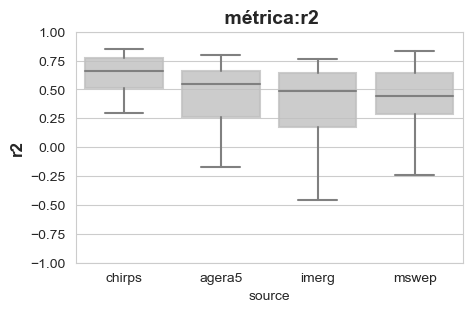

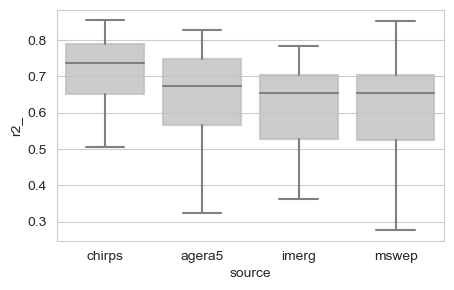

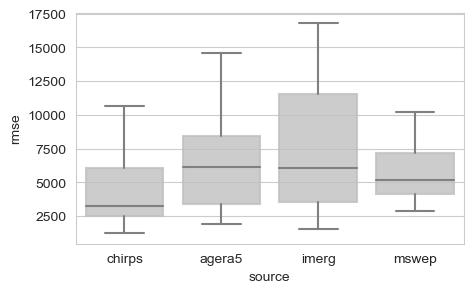

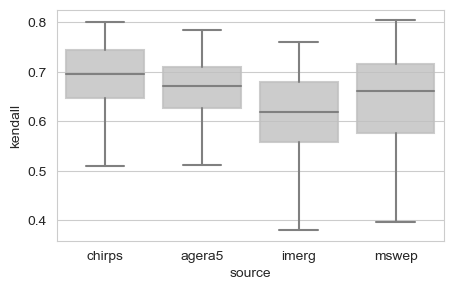

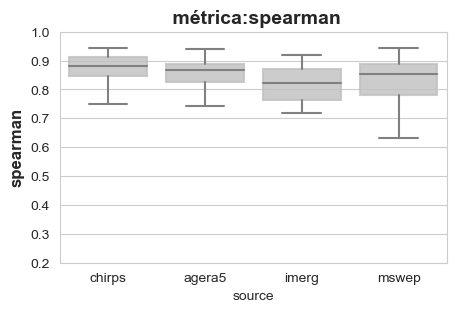

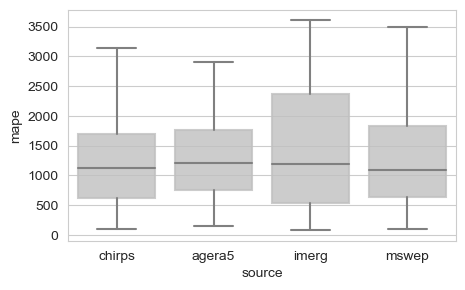

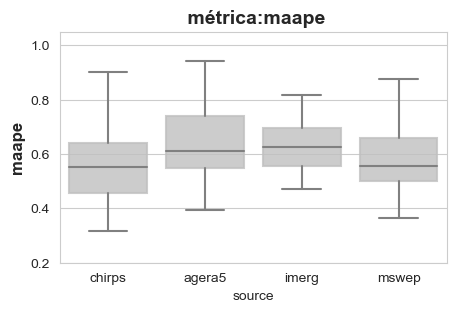

In [6]:
boxplot_overall(prec_overall)

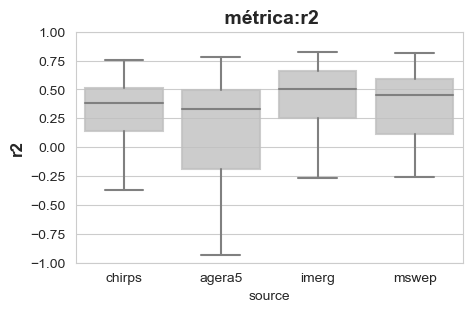

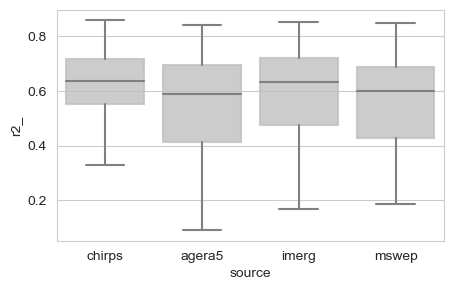

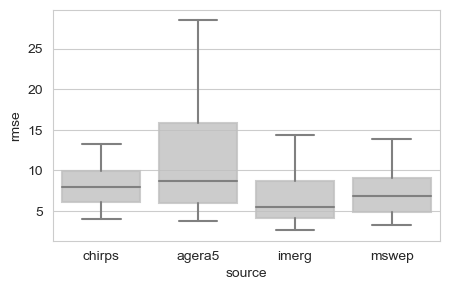

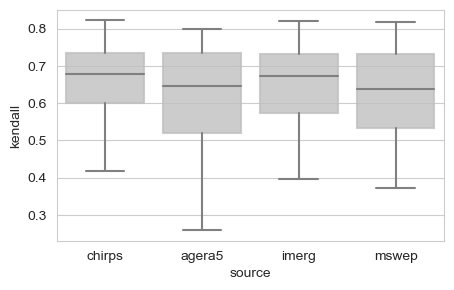

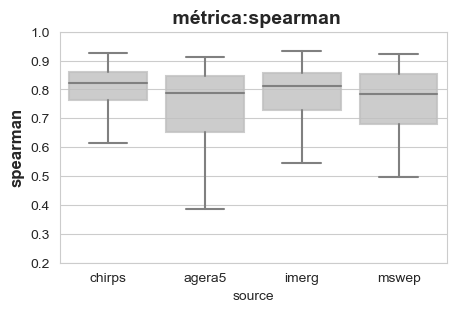

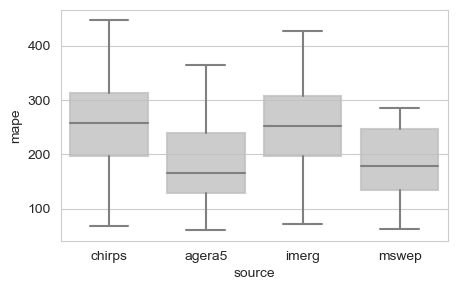

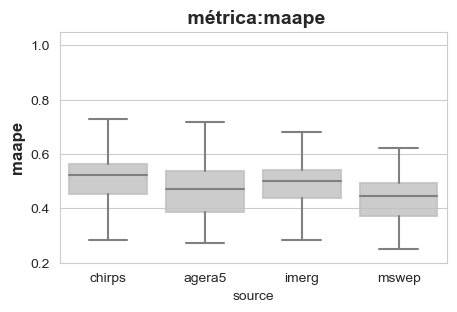

In [7]:
boxplot_overall(r10_overall)

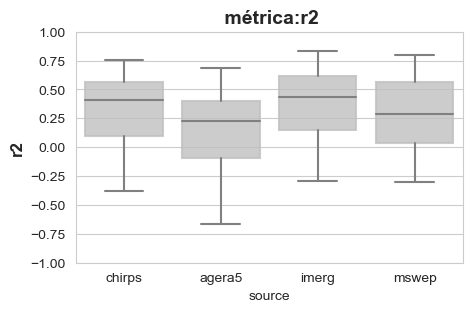

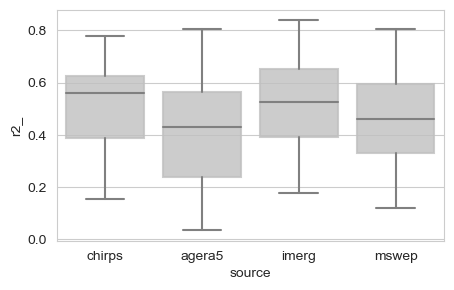

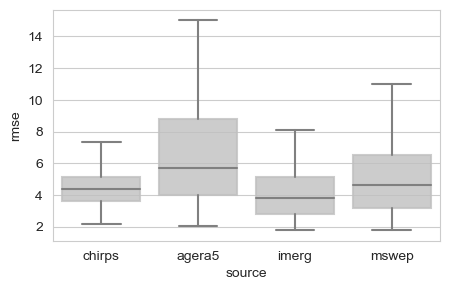

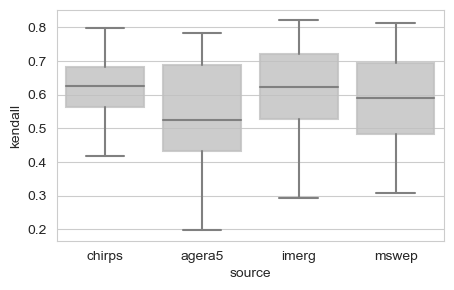

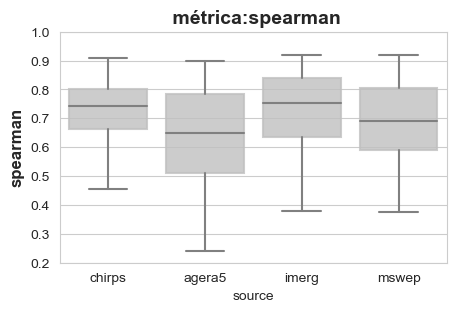

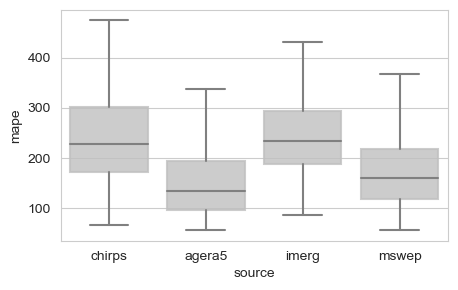

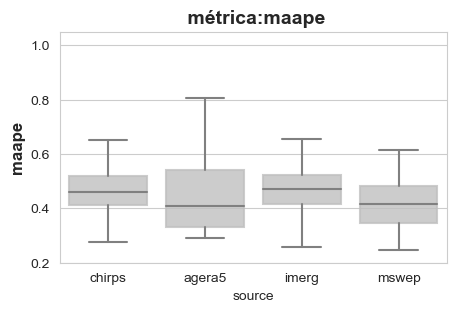

In [8]:
boxplot_overall(r15_overall)

# per month

In [9]:
prec_monthly = pd.read_csv(folder+'prec_metrics_monthly.csv')
prec_monthly.rename(columns={'Unnamed: 0':'estacion'}, inplace=True)


r10_monthly = pd.read_csv(folder+'r10_metrics_monthly.csv')
r10_monthly.rename(columns={'Unnamed: 0':'estacion'}, inplace=True)


r15_monthly = pd.read_csv(folder+'r15_metrics_monthly.csv')
r15_monthly.rename(columns={'Unnamed: 0':'estacion'}, inplace=True)


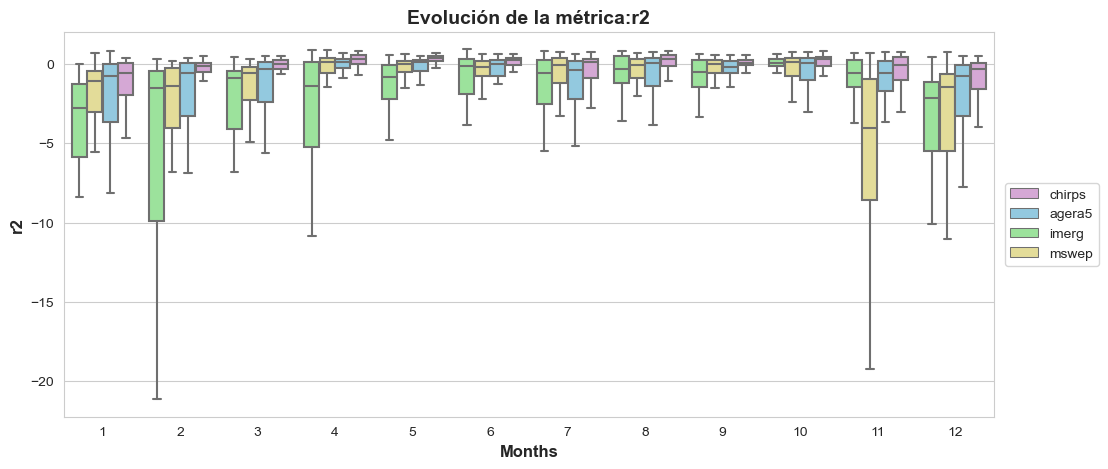

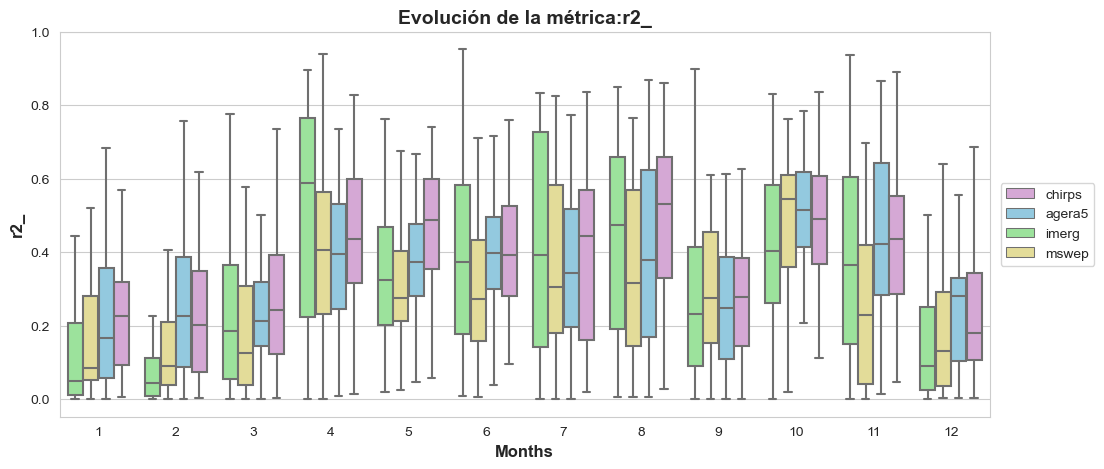

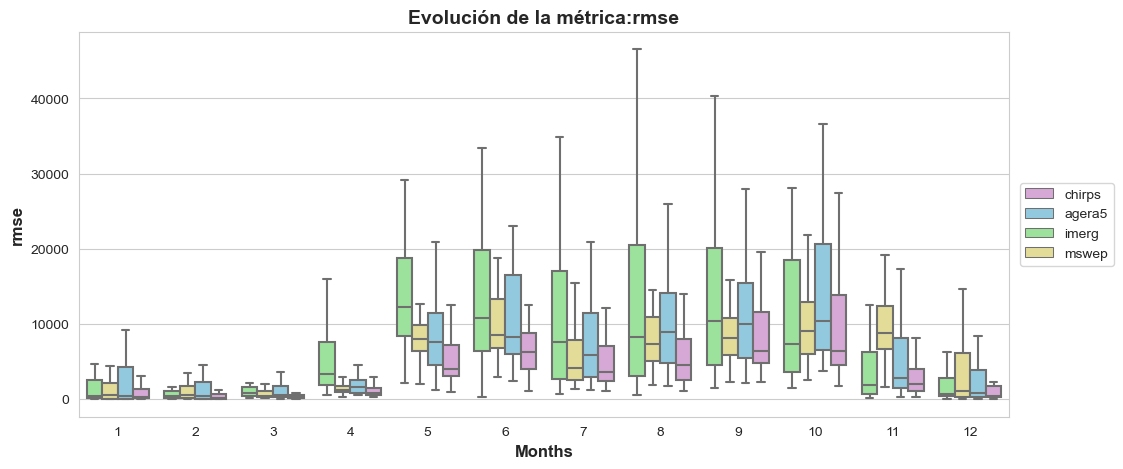

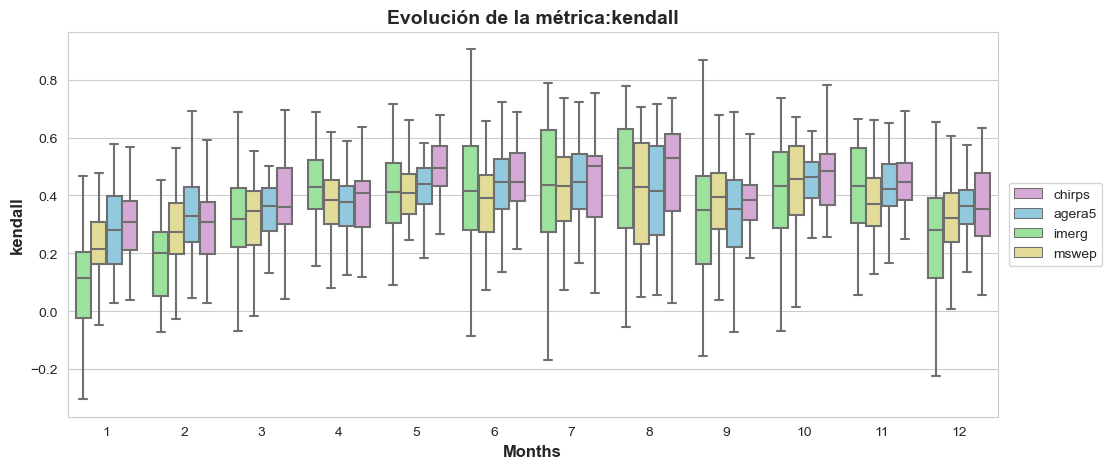

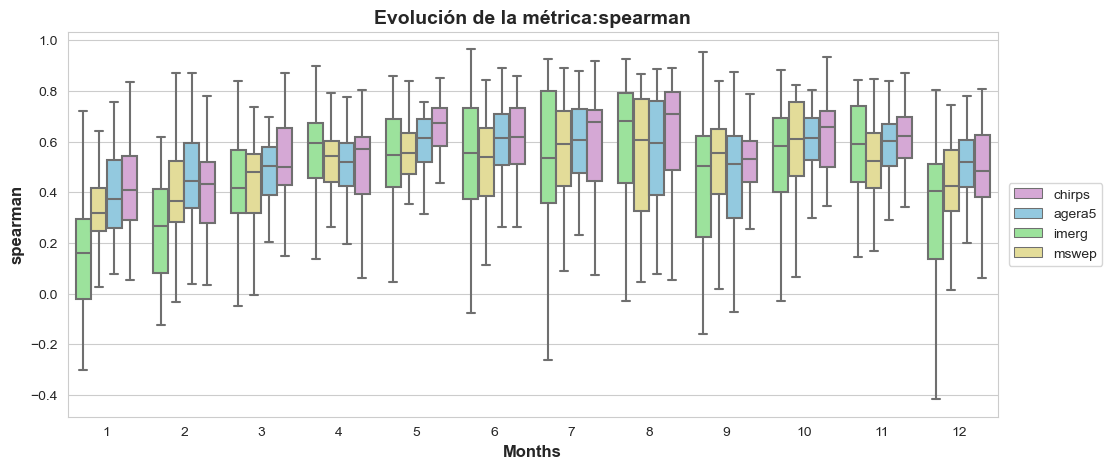

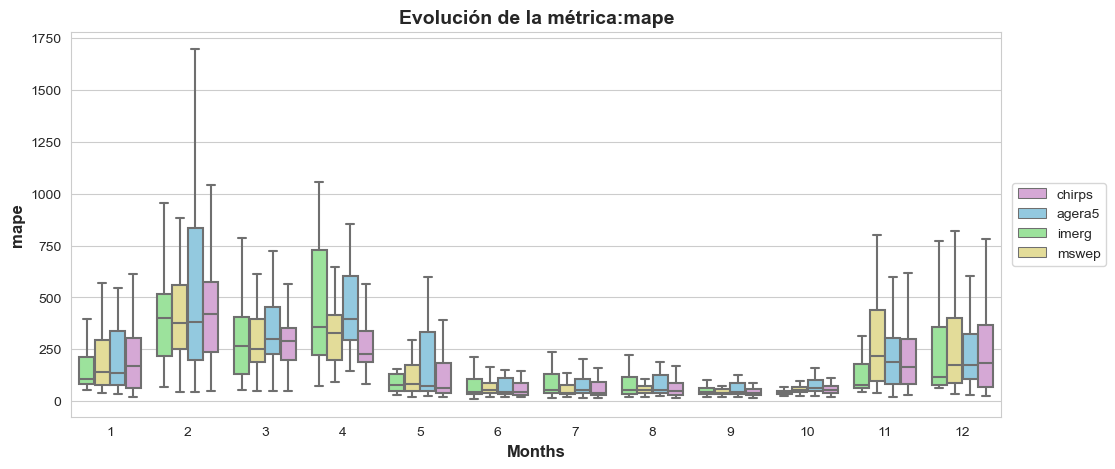

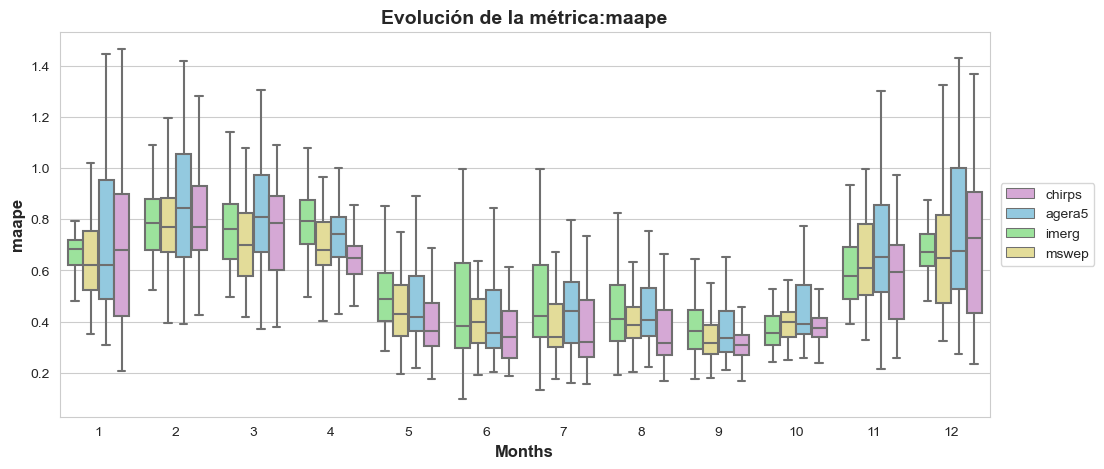

In [10]:
boxplots_months(prec_monthly)

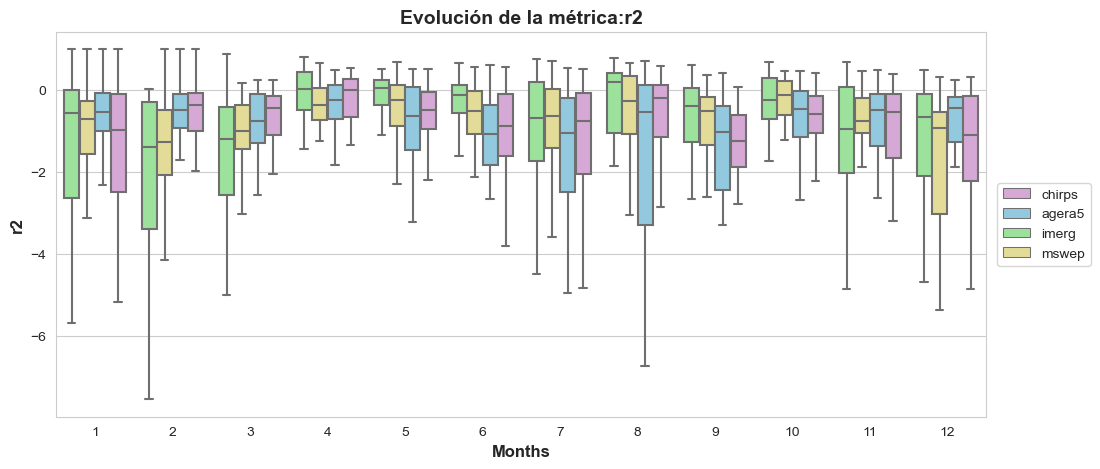

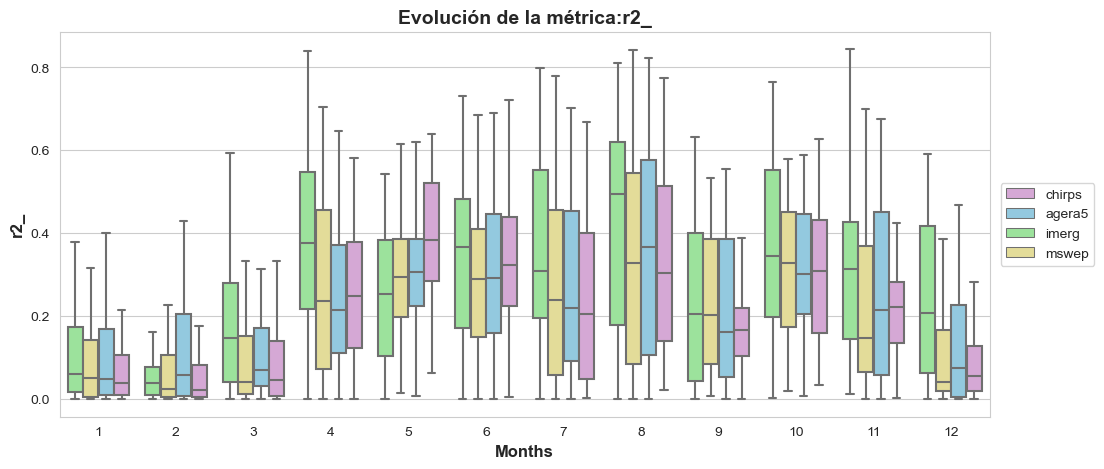

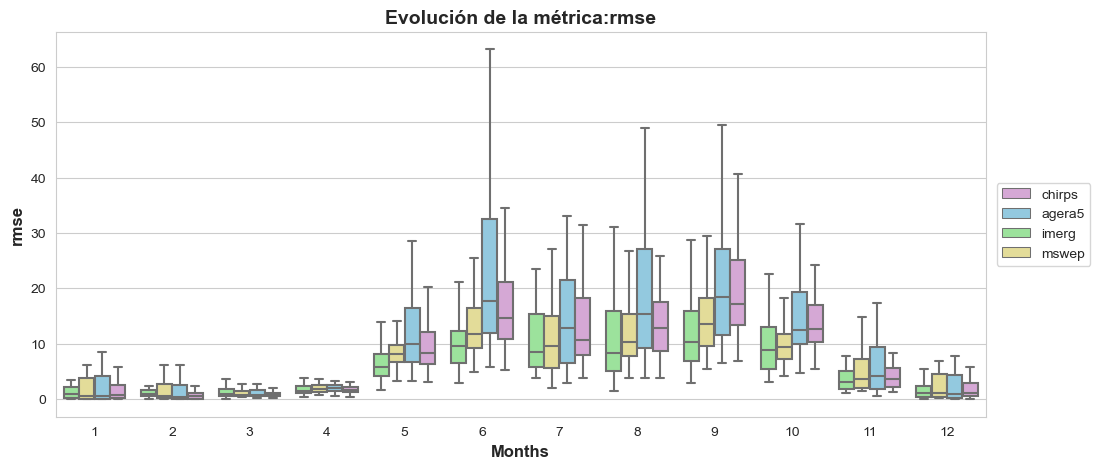

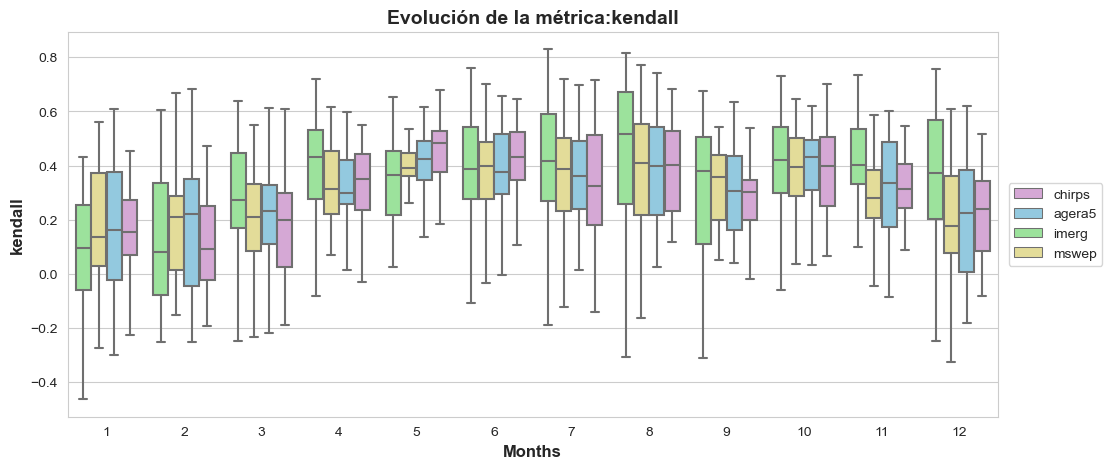

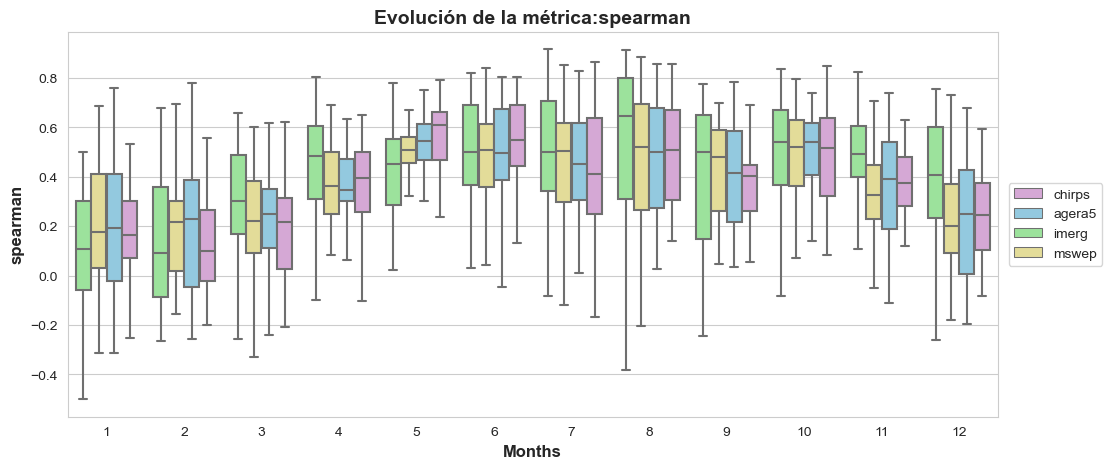

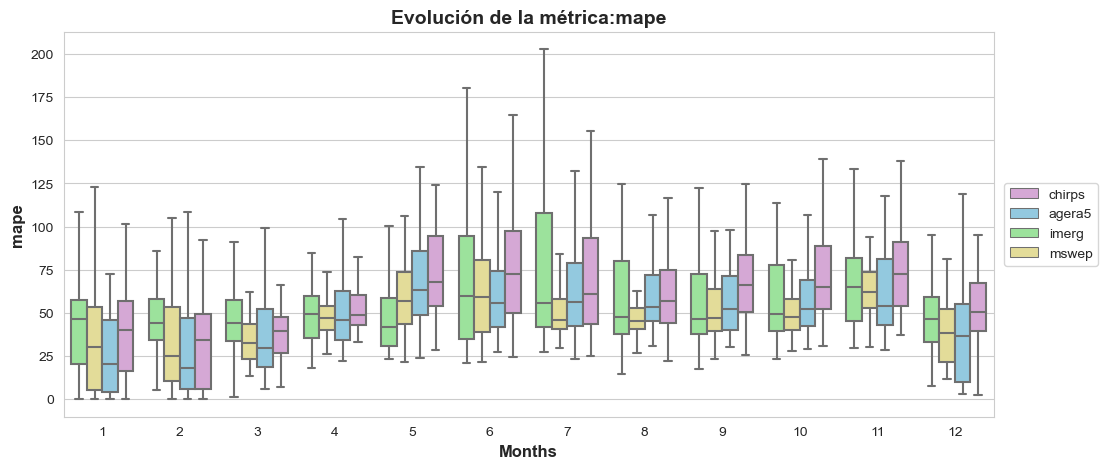

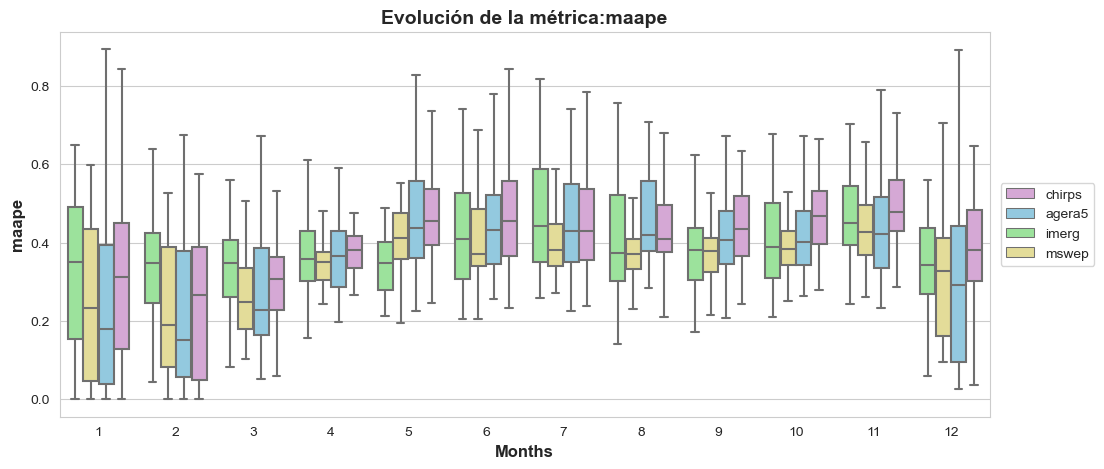

In [11]:
boxplots_months(r10_monthly)

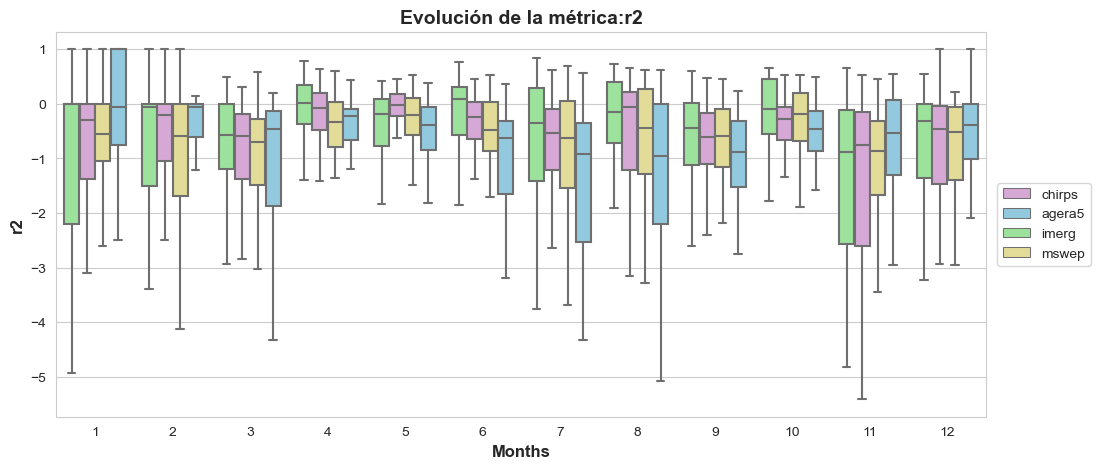

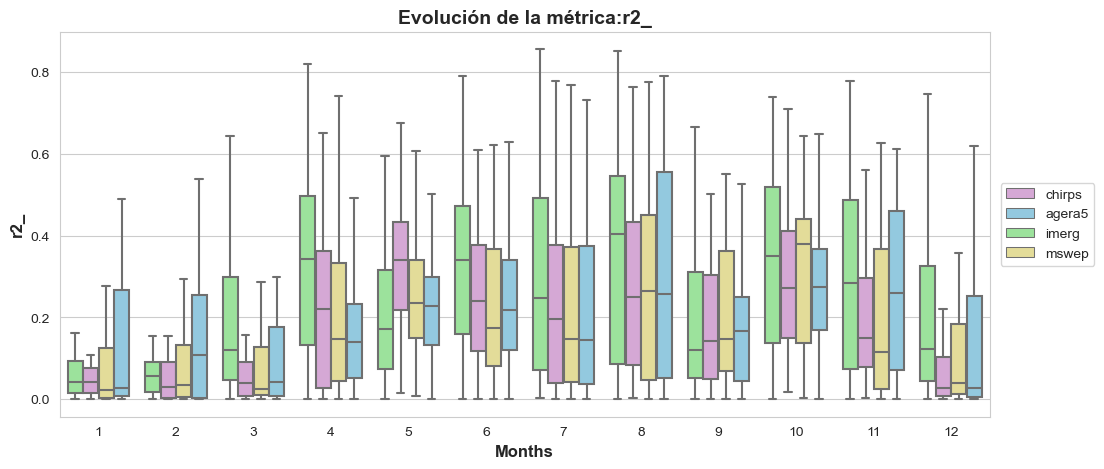

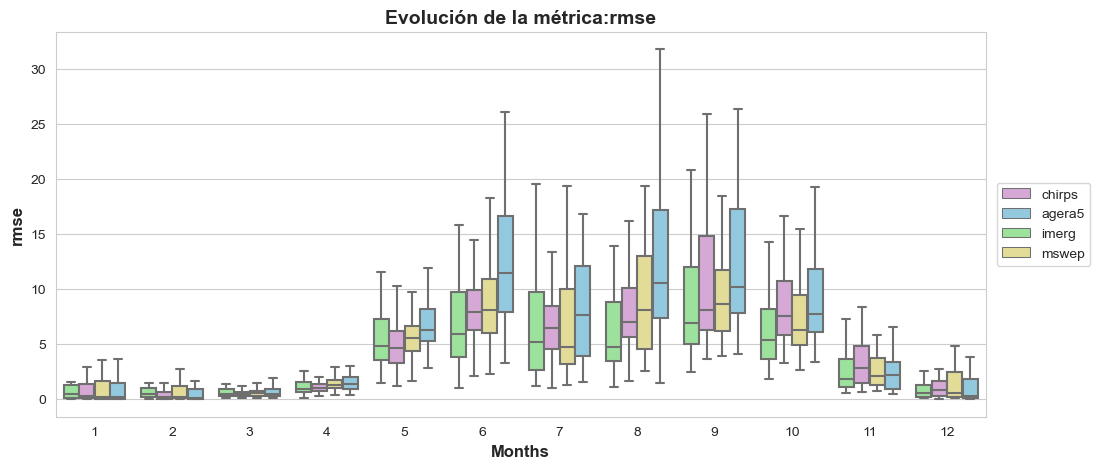

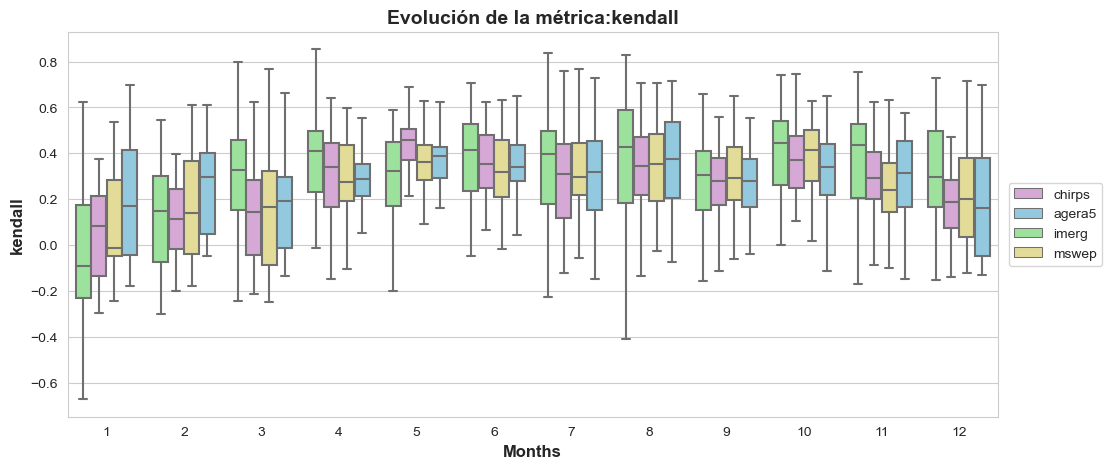

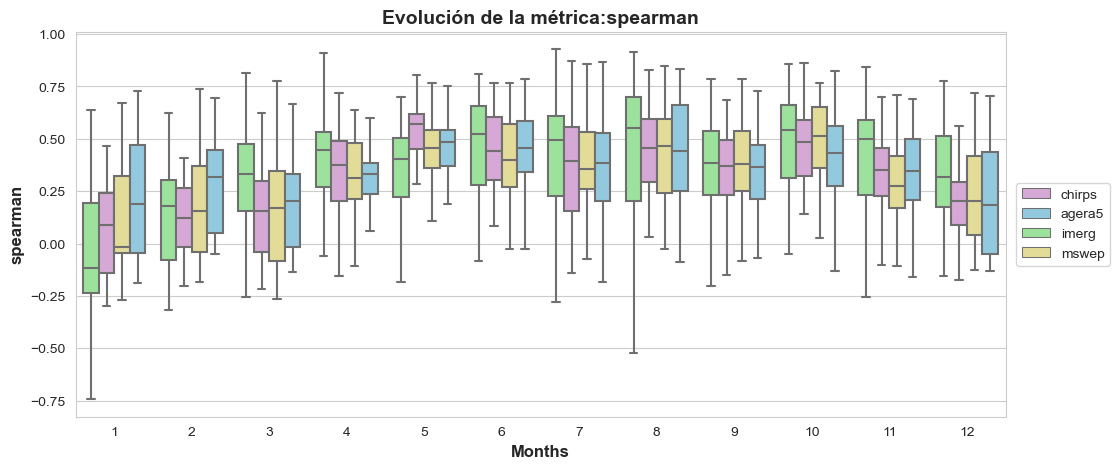

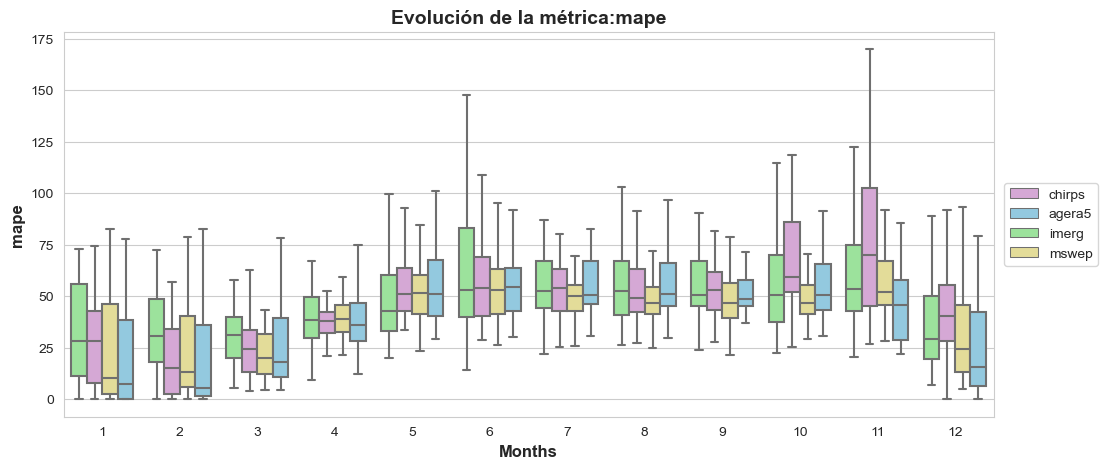

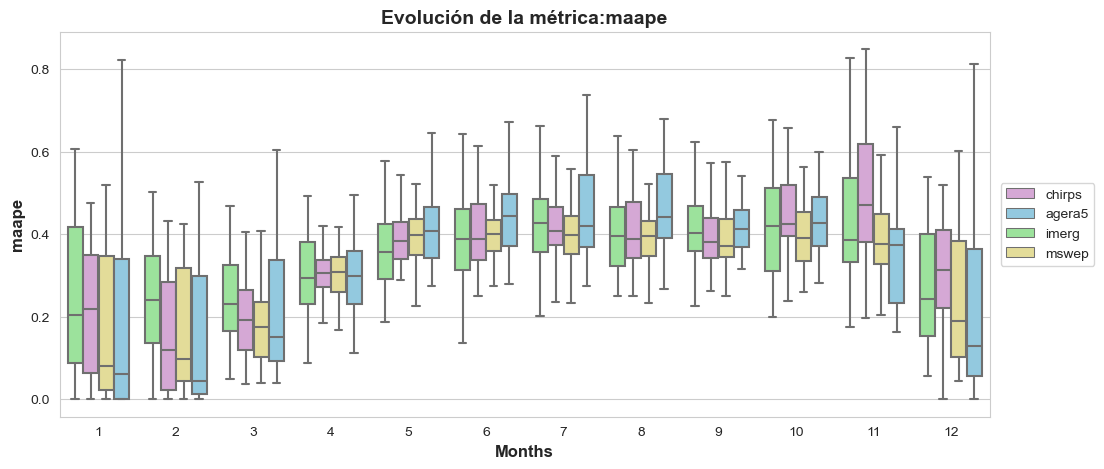

In [12]:
boxplots_months(r15_monthly)